In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

print(pd.__version__)

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')

# Convert dataset to pandas DataFrame
df = dataset['train'].to_pandas()

# Data Clean Up
# Change string to datetime ('job_posted_date' column)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Convert 'job_skills' string list to a python list
import ast
df['job_skills'] = df['job_skills'].apply(lambda string_list: ast.literal_eval(string_list) if pd.notna(string_list) else string_list)


2.2.3


In [4]:
df_DA_US = df[
    (df['job_title_short'] == 'Data Analyst') & 
    (df['job_country'] == 'United States')
    ]

In [5]:
df_DA_US.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."


In [11]:
df_DA_US_exploded = df_DA_US.explode('job_skills').copy()

In [12]:
df_DA_US_exploded.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,r,"{'programming': ['r'], 'sync': ['zoom']}"
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,zoom,"{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,word,"{'analyst_tools': ['word', 'excel', 'powerpoin..."
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,excel,"{'analyst_tools': ['word', 'excel', 'powerpoin..."


In [14]:
df_DA_US_exploded.dropna(subset=['job_skills', 'salary_year_avg'], inplace=True)

In [ ]:
df_skill_count_salary = df_DA_US_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median'),
)

In [23]:
df_skill_count_salary.head()

,skill_count,median_salary
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00


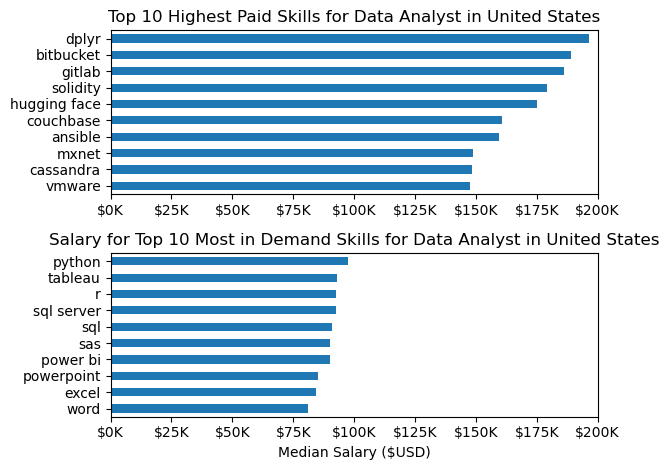

In [64]:
dict_plot = {
    'median_salary': 'Top 10 Highest Paid Skills for Data Analyst in United States',
    'skill_count' : 'Salary for Top 10 Most in Demand Skills for Data Analyst in United States'
}

fig, ax = plt.subplots(2,1)

for i, (col, title) in enumerate(dict_plot.items()):
    if col == 'skill_count':
            df_skill_count_salary.sort_values(by= col, ascending=False)['median_salary'].head(10).sort_values(ascending=False).plot(kind='barh', ax=ax[i])
    else:
        df_skill_count_salary.sort_values(by= col, ascending=False)['median_salary'].head(10).plot(kind='barh', ax=ax[i])
    ax[i].set_title(title)
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
    ax[i].set_xlim(0, 200000)
    if col == 'skill_count':
        ax[i].set_xlabel('Median Salary ($USD)')
    ax[i].set_ylabel('')
    ax[i].invert_yaxis()
plt.tight_layout() 
plt.show()  